In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from scipy.optimize import curve_fit

In [2]:
df_707 = pd.read_csv('C:/Users/chenj/Desktop/AION/2023/Loading Rate/Repump/707 repump load-0001.csv',skiprows=[1])

df_679 = pd.read_csv('C:/Users/chenj/Desktop/AION/2023/Loading Rate/Repump/679 repump load-0001_2.csv',skiprows=[1])

In [3]:
df_707.iloc[:,1] = df_707.iloc[:,1]+30
df_707.iloc[:,0] = df_707.iloc[:,0]  * 1000

df_679.iloc[:,1] = df_679.iloc[:,1]+30.1
df_679.iloc[:,0] = df_679.iloc[:,0]  * 1000

In [4]:
df_707 = df_707[df_707.iloc[:,0]  >= 1844]

df_707 = df_707[df_707.iloc[:,0]  <= 1862.5]


df_679 = df_679[df_679.iloc[:,0]  >= 2280.5]

df_679 = df_679[df_679.iloc[:,0]  <= 2296.5]

In [5]:
window_size_707 = 500
y_707 = np.convolve(df_707.iloc[:,1], np.ones(window_size_707)/window_size_707, mode='valid')

x_707 = df_707.iloc[:,0][(window_size_707-1)//2:-(window_size_707-1)//2]


window_size_679 = 600
y_679 = np.convolve(df_679.iloc[:,1], np.ones(window_size_679)/window_size_679, mode='valid')
x_679 = df_679.iloc[:,0][(window_size_679-1)//2:-(window_size_679-1)//2]

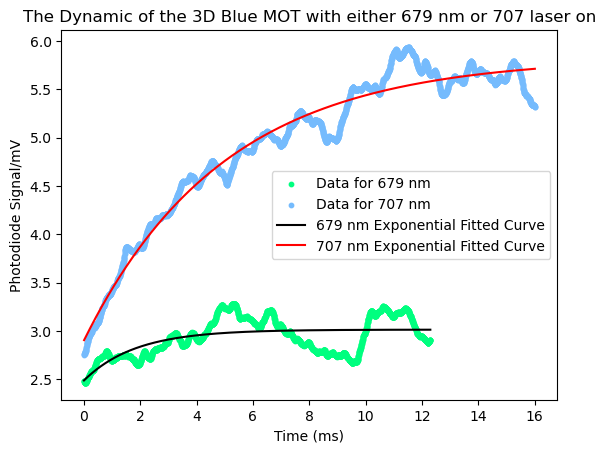

In [6]:
threshold_6 = 2282.7

# Use boolean indexing to filter values
filtered_indices = x_679 >= threshold_6
filtered_x_6 = x_679[filtered_indices]-2282.7
filtered_y_6 = y_679[filtered_indices]

threshold_7 = 1845.24

# Use boolean indexing to filter values
filtered_indices = x_707 >= threshold_7
filtered_x_7 = x_707[filtered_indices]-1845.24
filtered_y_7 = y_707[filtered_indices]

def exponential_decay(x, a, b, c):
    return a * (1-np.exp(-b * x)) + c

p0=[1.12245103*10**6, 1.88006444*10**(-1), 3.25469870*10**6]

params_6, covariance_6 = curve_fit(exponential_decay,filtered_x_6 , filtered_y_6,p0, maxfev=8000)
params_7, covariance_7 = curve_fit(exponential_decay,filtered_x_7 , filtered_y_7,p0, maxfev=8000)

a_opt_6, b_opt_6, c_opt_6 = params_6
a_opt_7, b_opt_7, c_opt_7 = params_7

y_fit_6 = exponential_decay(filtered_x_6, a_opt_6, b_opt_6, c_opt_6)
y_fit_7 = exponential_decay(filtered_x_7, a_opt_7, b_opt_7, c_opt_7)

plt.scatter(filtered_x_6, filtered_y_6,s=10,color = "springgreen", label='Data for 679 nm')

plt.scatter(filtered_x_7, filtered_y_7,s=10,color = "xkcd:sky blue", label='Data for 707 nm')


plt.plot(filtered_x_6, y_fit_6, label='679 nm Exponential Fitted Curve', color='black')
plt.plot(filtered_x_7, y_fit_7, label='707 nm Exponential Fitted Curve', color='red')


plt.xlabel('Time (ms)')
plt.ylabel("Photodiode Signal/mV")
plt.title('The Dynamic of the 3D Blue MOT with either 679 nm or 707 laser on')
plt.legend()

# Show the plot
plt.show()